In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import find_peaks
from scipy.ndimage import uniform_filter1d

In [3]:
def convert_float(value):
    # Convert bytes to string if necessary
    if isinstance(value, bytes):
        value = value.decode('utf-8')
    return float(value.replace(',', '.'))

def load_data_from_file(filename):
    # Define converters for each column to handle commas as decimal separators
    converters = {0: convert_float, 1: convert_float}
    
    # Load the data from the file using the converters and specifying the tab delimiter
    data = np.loadtxt(filename, delimiter='\t', converters=converters)
    
    # Extract each column from the data
    x = data[:, 0]
    y = data[:, 1]
    
    return x, y

x, y = load_data_from_file("H:/Escritorio/Python/Datos1.txt")
x1, y1 = load_data_from_file("H:/Escritorio/Python/Datos2.txt")
#x2, y2 = load_data_from_file("H:/Escritorio/Python/Datos3.txt")
#x3, y3 = load_data_from_file("H:/Escritorio/Python/Datos4.txt")
#x4, y4 = load_data_from_file("H:/Escritorio/Python/Datos5.txt")

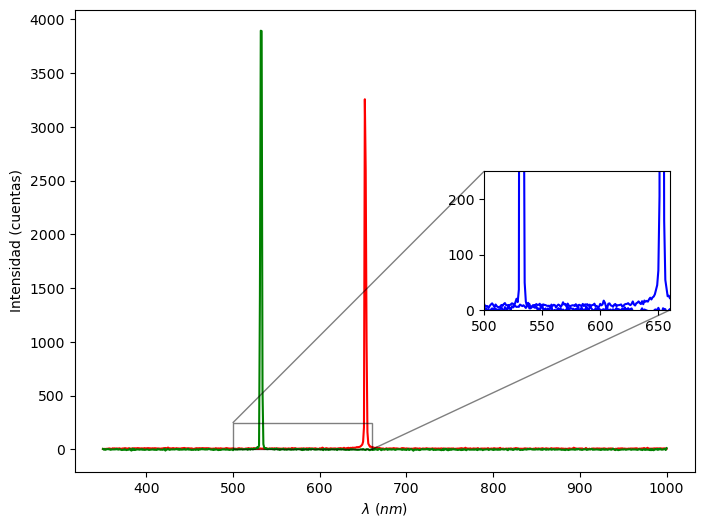

In [16]:
# Define los límites de la región que quieres ampliar (ajusta estos valores según tus necesidades)
x_zoom_min = 500    # valor mínimo de x para el zoom
x_zoom_max = 660    # valor máximo de x para el zoom
y_zoom_min = 0    # valor mínimo de y para el zoom
y_zoom_max = 250    # valor máximo de y para el zoom

# Crea la figura y el eje principal
fig, ax = plt.subplots(figsize=(8, 6))
ax.plot(x, y, color='red', label='Datos completos')
ax.plot(x1, y1, color='green', label='Datos completos')


ax.set_xlabel(r'$\lambda$ $(nm)$')
ax.set_ylabel('Intensidad (cuentas)')
#ax.set_title('Diodo de emisión roja')

# Crea el eje inset para el zoom; los valores en la lista definen [x0, y0, ancho, alto] en coordenadas relativas
axins = ax.inset_axes([0.66, 0.35, 0.3, 0.3])
axins.plot(x, y, color='blue')
axins.plot(x1, y1, color='blue')
axins.set_xlim(x_zoom_min, x_zoom_max)
axins.set_ylim(y_zoom_min, y_zoom_max)


# Dibuja líneas que conectan el inset con la región ampliada en el gráfico principal
ax.indicate_inset_zoom(axins, edgecolor="black")

# Guarda la figura (ajusta la ruta y el nombre del archivo según corresponda)
plt.savefig("H:/Escritorio/foto")
plt.show()
